# Machine Learning Project: Crash Reporting Analysis

## Predicting Injury Severity in Vehicle Crashes

This notebook contains a comprehensive analysis of crash reporting data, including:
- Exploratory Data Analysis (EDA)
- Data Preprocessing and Feature Engineering
- Model Training (Multiple Algorithms)
- Model Evaluation and Comparison


## 1. Import Required Libraries


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)


## 2. Load Dataset


In [2]:
# Load the dataset
df = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*50)
print("First few rows:")
df.head()


Dataset Shape: (206309, 39)

Number of rows: 206,309
Number of columns: 39

First few rows:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3126006X,250037402,MONTGOMERY,Injury Crash,08/21/2025 05:21:00 PM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Northbound,40,No,No,2013,KIA,SOUL,39.219796,-77.257416,"(39.219796, -77.25741635)"
1,MCP2349001B,250037516,MONTGOMERY,Property Damage Crash,08/22/2025 10:44:00 AM,Interstate (State),EISENHOWER MEMORIAL HWY,NaN,NaN,NaN,...,Northbound,55,No,No,0,NaN,NaN,39.180181,-77.250657,"(39.18018079, -77.25065714)"
2,MCP296500BC,250033157,MONTGOMERY,Property Damage Crash,07/25/2025 11:55:00 AM,Bicycle Route,NaN,NEW HAMPSHIRE AVE (SB/L) NORBECK RD (WB/L) SPE...,NaN,NaN,...,Westbound,40,No,No,2023,LEXUS,RX,39.121219,-76.988905,"(39.12121898, -76.98890509)"
3,MCP2159003K,250037509,MONTGOMERY,Property Damage Crash,08/22/2025 10:36:00 AM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Southbound,30,No,No,2003,TOYOTA,SIENNA,39.207931,-77.141480,"(39.20793083, -77.1414795)"
4,MCP312900D6,250034573,MONTGOMERY,Property Damage Crash,08/03/2025 02:10:00 PM,NaN,NaN,NaN,Parking Lot Way PARKING LOT OF 2741 UNI...,NaN,...,Not On Roadway,0,No,No,2023,SUBARU,IMPREZA,39.039662,-77.057238,"(39.03966248, -77.05723843)"


## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview


In [3]:
# Display column names and data types
print("Column Information:")
print(df.info())
print("\n" + "="*50)
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206309 entries, 0 to 206308
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  206309 non-null  object 
 1   Local Case Number              206309 non-null  object 
 2   Agency Name                    206309 non-null  object 
 3   ACRS Report Type               206309 non-null  object 
 4   Crash Date/Time                206309 non-null  object 
 5   Route Type                     186120 non-null  object 
 6   Road Name                      182865 non-null  object 
 7   Cross-Street Name              168701 non-null  object 
 8   Off-Road Description           19149 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6734 non-null    object 
 11  Collision Type                 205724 non-null  object 
 12  Weather   

Missing Values Summary:
                      Column  Missing Count  Missing Percentage
Non-Motorist Substance Abuse         200721           97.291441
        Related Non-Motorist         199575           96.735964
                Municipality         187183           90.729440
        Off-Road Description         187160           90.718291
                Circumstance         166440           80.675104
           Cross-Street Name          37608           18.228967
      Driver Substance Abuse          31320           15.181112
             Traffic Control          28640           13.882089
           Surface Condition          23493           11.387288
                   Road Name          23444           11.363537
                  Route Type          20189            9.785807
       Drivers License State          13827            6.702083
                     Weather          13356            6.473784
           Vehicle Going Dir           8710            4.221823
           Vehic

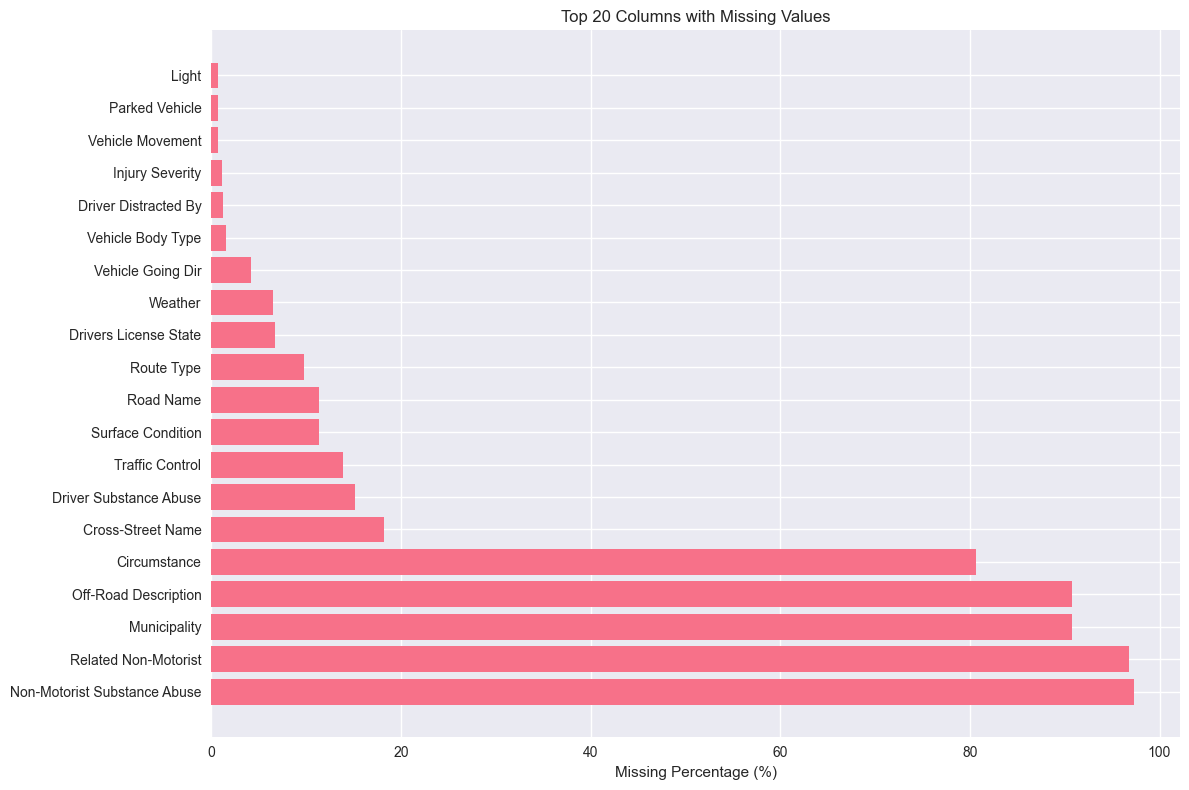

In [4]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
if len(missing_df) > 0:
    print(missing_df.head(20).to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(20)
    plt.barh(top_missing['Column'], top_missing['Missing Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found.")


### 3.2 Target Variable Analysis


Injury Severity Distribution:


         Injury Severity  Count  Percentage
      NO APPARENT INJURY 141196   69.205244
      No Apparent Injury  26351   12.915574
         POSSIBLE INJURY  17481    8.568068
  SUSPECTED MINOR INJURY  11871    5.818405
  Suspected Minor Injury   2915    1.428746
         Possible Injury   2331    1.142507
SUSPECTED SERIOUS INJURY   1414    0.693052
Suspected Serious Injury    278    0.136258
            FATAL INJURY    154    0.075481
            Fatal Injury     34    0.016665


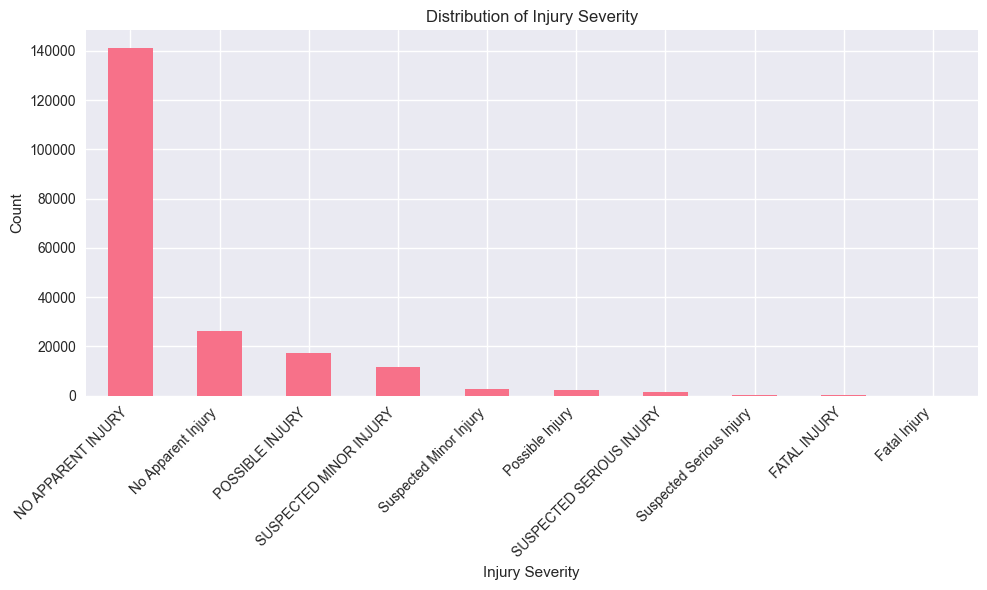

In [5]:
# Analyze the target variable: Injury Severity
print("Injury Severity Distribution:")
injury_counts = df['Injury Severity'].value_counts()
injury_percent = df['Injury Severity'].value_counts(normalize=True) * 100

injury_df = pd.DataFrame({
    'Injury Severity': injury_counts.index,
    'Count': injury_counts.values,
    'Percentage': injury_percent.values
})
print(injury_df.to_string(index=False))

# Visualize injury severity distribution
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.3 Summary Statistics


Numerical Columns:
['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude']


Summary Statistics for Numerical Features:
         Speed Limit   Vehicle Year       Latitude      Longitude
count  206309.000000  206309.000000  206309.000000  206309.000000
mean       32.176468    1965.141526      39.083042     -77.112071
std        11.326332     342.311142       0.071821       0.098069
min         0.000000       0.000000      37.720000     -79.486000
25%        25.000000    2006.000000      39.024417     -77.189273
50%        35.000000    2012.000000      39.074833     -77.105170
75%        40.000000    2016.000000      39.139680     -77.039184
max        75.000000    9999.000000      39.990414     -75.527708


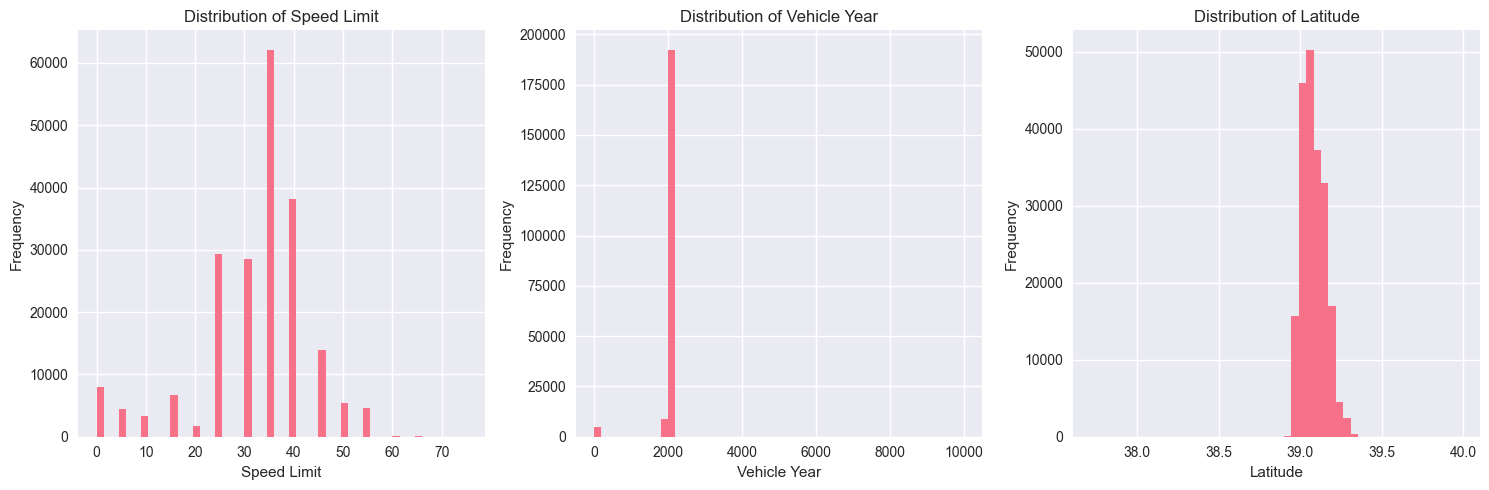

In [6]:
# Summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)
print("\n" + "="*50)

if len(numerical_cols) > 0:
    print("\nSummary Statistics for Numerical Features:")
    print(df[numerical_cols].describe())
    
    # Visualize distributions
    n_cols = min(3, len(numerical_cols))
    if n_cols > 0:
        fig, axes = plt.subplots(1, n_cols, figsize=(15, 5))
        if n_cols == 1:
            axes = [axes]
        for i, col in enumerate(numerical_cols[:n_cols]):
            df[col].hist(bins=50, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()


### 3.4 Correlation Analysis


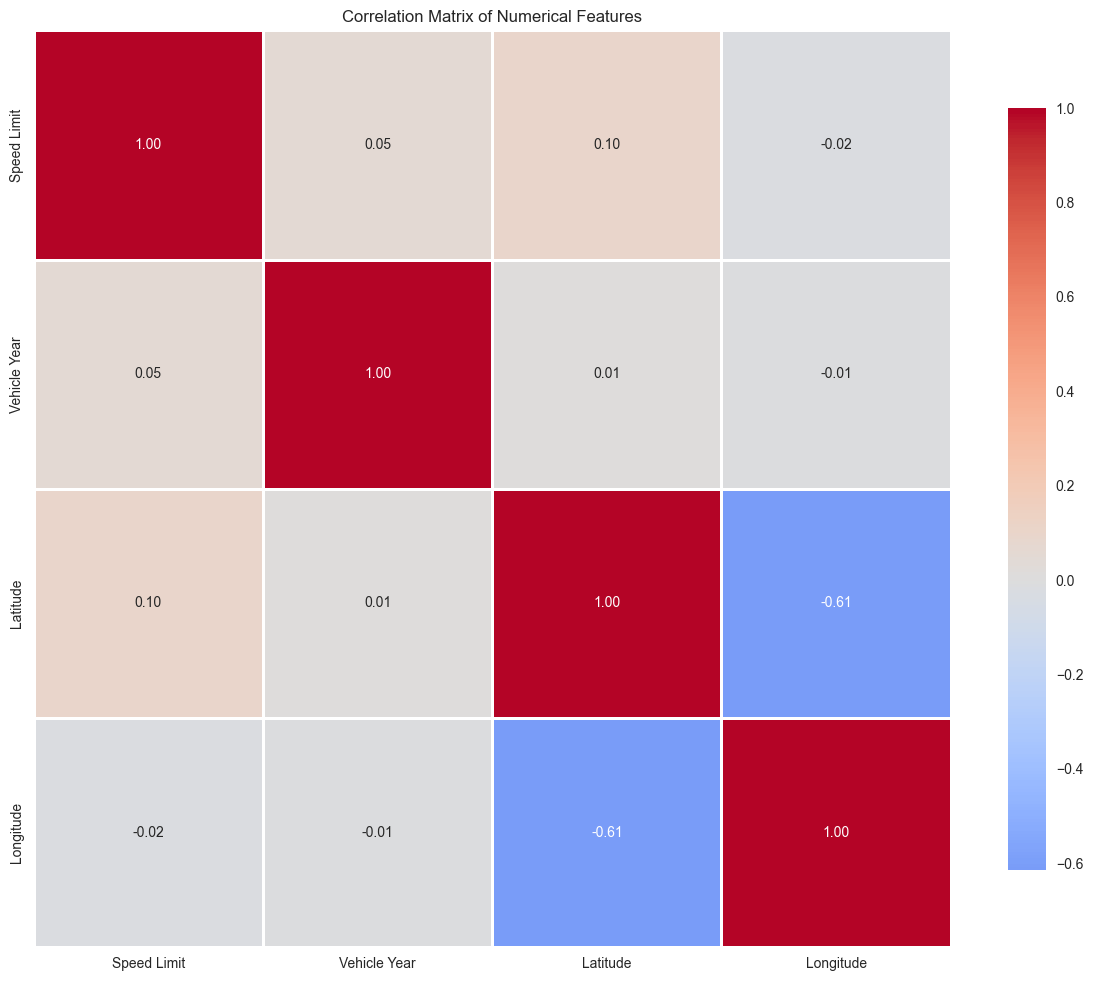

In [7]:
# Calculate correlations for numerical features
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()


## 4. Data Preprocessing

### 4.1 Data Cleaning


In [8]:
# Create a copy for preprocessing
df_processed = df.copy()

print(f"Original dataset shape: {df_processed.shape}")

# Remove rows where target variable is missing
df_processed = df_processed.dropna(subset=['Injury Severity'])
print(f"After removing rows with missing Injury Severity: {df_processed.shape}")

# Remove duplicate rows
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
print(f"After removing duplicates: {df_processed.shape} (removed {initial_rows - len(df_processed)} duplicates)")

# Remove identifier columns
columns_to_drop = ['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID', 'Location']
df_processed = df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns])
print(f"After removing identifier columns: {df_processed.shape}")


Original dataset shape: (206309, 39)
After removing rows with missing Injury Severity: (204025, 39)
After removing duplicates: (204025, 39) (removed 0 duplicates)
After removing identifier columns: (204025, 34)


### 4.2 Feature Selection and Engineering


In [9]:
# Select relevant features for modeling
selected_features = [
    'Weather', 'Surface Condition', 'Light', 'Traffic Control',
    'Collision Type', 'Driver At Fault', 'Driver Substance Abuse',
    'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
    'Speed Limit', 'Vehicle Year', 'Route Type'
]

# Filter to only include features that exist in the dataset
selected_features = [f for f in selected_features if f in df_processed.columns]

# Add target variable
target = 'Injury Severity'

# Create feature and target datasets
X = df_processed[selected_features].copy()
y = df_processed[target].copy()

print(f"Selected features: {selected_features}")
print(f"\nFeature dataset shape: {X.shape}")
print(f"Target dataset shape: {y.shape}")


Selected features: ['Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Collision Type', 'Driver At Fault', 'Driver Substance Abuse', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Vehicle Year', 'Route Type']

Feature dataset shape: (204025, 13)
Target dataset shape: (204025,)


In [10]:
# Feature Engineering: Create new features
import joblib

# 1. Extract hour from crash date/time if available
if 'Crash Date/Time' in df_processed.columns:
    try:
        df_processed['Crash Date/Time'] = pd.to_datetime(df_processed['Crash Date/Time'], errors='coerce')
        df_processed['Crash Hour'] = df_processed['Crash Date/Time'].dt.hour
        df_processed['Crash DayOfWeek'] = df_processed['Crash Date/Time'].dt.dayofweek
        selected_features.extend(['Crash Hour', 'Crash DayOfWeek'])
        X['Crash Hour'] = df_processed['Crash Hour']
        X['Crash DayOfWeek'] = df_processed['Crash DayOfWeek']
    except:
        pass

# 2. Calculate vehicle age
if 'Vehicle Year' in X.columns:
    current_year = 2025
    X['Vehicle Age'] = current_year - X['Vehicle Year'].replace(0, np.nan)
    X['Vehicle Age'] = X['Vehicle Age'].fillna(X['Vehicle Age'].median())
    if 'Vehicle Year' in selected_features:
        selected_features.remove('Vehicle Year')
    selected_features.append('Vehicle Age')

# 3. Create binary features for substance abuse
if 'Driver Substance Abuse' in X.columns:
    X['Has_Substance_Abuse'] = X['Driver Substance Abuse'].apply(
        lambda x: 1 if pd.notna(x) and 'Suspect' in str(x) else 0
    )
    selected_features.append('Has_Substance_Abuse')

print(f"\nAfter feature engineering, we have {len(selected_features)} features")



After feature engineering, we have 16 features


### 4.3 Handle Missing Values and Encode Categorical Variables


In [11]:
# Fill missing values
for col in selected_features:
    if col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].fillna('Unknown')
        else:
            X[col] = X[col].fillna(X[col].median())

print("Missing values after imputation:")
print(X[selected_features].isnull().sum().sum(), "missing values remaining")

# Separate categorical and numerical features
categorical_features = [f for f in selected_features if X[f].dtype == 'object']
numerical_features = [f for f in selected_features if X[f].dtype != 'object']

print(f"\nCategorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X[categorical_features], prefix=categorical_features, drop_first=True)

# Combine with numerical features
X_final = pd.concat([X[numerical_features], X_encoded], axis=1)

print(f"\nFinal feature matrix shape: {X_final.shape}")
print(f"Number of features after encoding: {X_final.shape[1]}")


Missing values after imputation:
0 missing values remaining

Categorical features: 11
Numerical features: 5

Final feature matrix shape: (204025, 267)
Number of features after encoding: 267


### 4.4 Handle Class Imbalance and Split Data


In [12]:
# Check class distribution
print("Class distribution:")
print(y.value_counts())
print("\nClass percentages:")
print(y.value_counts(normalize=True) * 100)

# Keep classes that have at least 1% of the data
y_counts = y.value_counts()
min_samples = len(y) * 0.01
common_classes = y_counts[y_counts >= min_samples].index.tolist()
print(f"\nCommon classes (>=1% of data): {common_classes}")

# Filter to common classes only
mask = y.isin(common_classes)
X_final = X_final[mask]
y = y[mask]

print(f"\nAfter filtering to common classes:")
print(f"X shape: {X_final.shape}")
print(f"y shape: {y.shape}")
print(f"\nFinal class distribution:")
print(y.value_counts())

# Split into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTraining set: {X_train.shape[0]:,} samples")
print(f"Validation set: {X_val.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nData preprocessing complete!")


Class distribution:
Injury Severity
NO APPARENT INJURY          141196
No Apparent Injury           26351
POSSIBLE INJURY              17481
SUSPECTED MINOR INJURY       11871
Suspected Minor Injury        2915
Possible Injury               2331
SUSPECTED SERIOUS INJURY      1414
Suspected Serious Injury       278
FATAL INJURY                   154
Fatal Injury                    34
Name: count, dtype: int64

Class percentages:
Injury Severity
NO APPARENT INJURY          69.205244
No Apparent Injury          12.915574
POSSIBLE INJURY              8.568068
SUSPECTED MINOR INJURY       5.818405
Suspected Minor Injury       1.428746
Possible Injury              1.142507
SUSPECTED SERIOUS INJURY     0.693052
Suspected Serious Injury     0.136258
FATAL INJURY                 0.075481
Fatal Injury                 0.016665
Name: proportion, dtype: float64

Common classes (>=1% of data): ['NO APPARENT INJURY', 'No Apparent Injury', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 'Suspected Minor 

In [ ]:
# Optional: subsample training set for faster hyperparameter tuning
USE_SAMPLE_FOR_TUNING = True
TUNING_SAMPLE_SIZE = 40000  # adjust as needed

if USE_SAMPLE_FOR_TUNING and len(X_train) > TUNING_SAMPLE_SIZE:
    X_tune, _, y_tune, _ = train_test_split(
        X_train, y_train,
        train_size=TUNING_SAMPLE_SIZE,
        stratify=y_train,
        random_state=42
    )
    tune_indices = X_tune.index
    X_train_scaled_tune = X_train_scaled.loc[tune_indices]
    print(f"Using subsample for tuning: {len(X_tune):,} rows")
else:
    X_tune, y_tune = X_train, y_train
    X_train_scaled_tune = X_train_scaled
    print("Using full training set for tuning")


## 5. Model Training

### 5.1 Model 1: Random Forest Classifier


In [ ]:
# Random Forest Classifier with Hyperparameter Tuning
print("Training Random Forest Classifier with Hyperparameter Tuning...")

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest (small grid for speed)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [12, 18],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

# Base model
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=1,  # Use 1 job to avoid Windows multiprocessing issues
    class_weight='balanced'
)

# GridSearchCV for hyperparameter tuning
print("Performing GridSearchCV for Random Forest...")
print("Note: Using n_jobs=1 to avoid Windows multiprocessing issues. Small grid and cv=2 for speed.")
rf_grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=2,  # 2-fold cross-validation for speed
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

rf_grid_search.fit(X_tune, y_tune)

# Get best model
rf_model = rf_grid_search.best_estimator_

print(f"\nBest parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_:.4f}")

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_val_acc = accuracy_score(y_val, y_val_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest - Validation Accuracy: {rf_val_acc:.4f}")
print(f"Random Forest - Test Accuracy: {rf_test_acc:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


Training Random Forest Classifier with Hyperparameter Tuning...
Performing GridSearchCV for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

### 5.2 Model 2: Gradient Boosting Classifier


In [ ]:
# Gradient Boosting Classifier with Hyperparameter Tuning
print("Training Gradient Boosting Classifier with Hyperparameter Tuning...")

# Define parameter grid for Gradient Boosting (small grid for speed)
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5]
}

# Base model
gb_base = GradientBoostingClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
print("Performing GridSearchCV for Gradient Boosting...")
gb_grid_search = GridSearchCV(
    estimator=gb_base,
    param_grid=gb_param_grid,
    cv=2,  # 2-fold cross-validation for speed
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

gb_grid_search.fit(X_tune, y_tune)

# Get best model
gb_model = gb_grid_search.best_estimator_

print(f"\nBest parameters for Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Best cross-validation score: {gb_grid_search.best_score_:.4f}")

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate metrics
gb_train_acc = accuracy_score(y_train, y_train_pred_gb)
gb_val_acc = accuracy_score(y_val, y_val_pred_gb)
gb_test_acc = accuracy_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting - Training Accuracy: {gb_train_acc:.4f}")
print(f"Gradient Boosting - Validation Accuracy: {gb_val_acc:.4f}")
print(f"Gradient Boosting - Test Accuracy: {gb_test_acc:.4f}")


Training Gradient Boosting Classifier...
Gradient Boosting - Training Accuracy: 0.8329
Gradient Boosting - Validation Accuracy: 0.8291
Gradient Boosting - Test Accuracy: 0.8290


### 5.3 Model 3: Logistic Regression


In [ ]:
# Logistic Regression with Hyperparameter Tuning (using scaled data)
print("Training Logistic Regression Classifier with Hyperparameter Tuning...")

# Define parameter grid for Logistic Regression (small grid for speed)
lr_param_grid = {
    'C': [0.5, 1.0],
    'solver': ['lbfgs'],
    'max_iter': [500, 800]
}

# Base model
lr_base = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    multi_class='multinomial'
)

# GridSearchCV for hyperparameter tuning
print("Performing GridSearchCV for Logistic Regression...")
lr_grid_search = GridSearchCV(
    estimator=lr_base,
    param_grid=lr_param_grid,
    cv=2,  # 2-fold cross-validation for speed
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled_tune, y_tune)

# Get best model
lr_model = lr_grid_search.best_estimator_

print(f"\nBest parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best cross-validation score: {lr_grid_search.best_score_:.4f}")

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_val_pred_lr = lr_model.predict(X_val_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_train_acc = accuracy_score(y_train, y_train_pred_lr)
lr_val_acc = accuracy_score(y_val, y_val_pred_lr)
lr_test_acc = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression - Training Accuracy: {lr_train_acc:.4f}")
print(f"Logistic Regression - Validation Accuracy: {lr_val_acc:.4f}")
print(f"Logistic Regression - Test Accuracy: {lr_test_acc:.4f}")


Training Logistic Regression Classifier...
Logistic Regression - Training Accuracy: 0.5542
Logistic Regression - Validation Accuracy: 0.5492
Logistic Regression - Test Accuracy: 0.5490


## 6. Model Evaluation

### 6.1 Comprehensive Metrics Comparison



Model Comparison (Test Set):
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.555740   0.795403 0.555740  0.631409
  Gradient Boosting  0.828959   0.746973 0.828959  0.756257
Logistic Regression  0.549037   0.794879 0.549037  0.626315


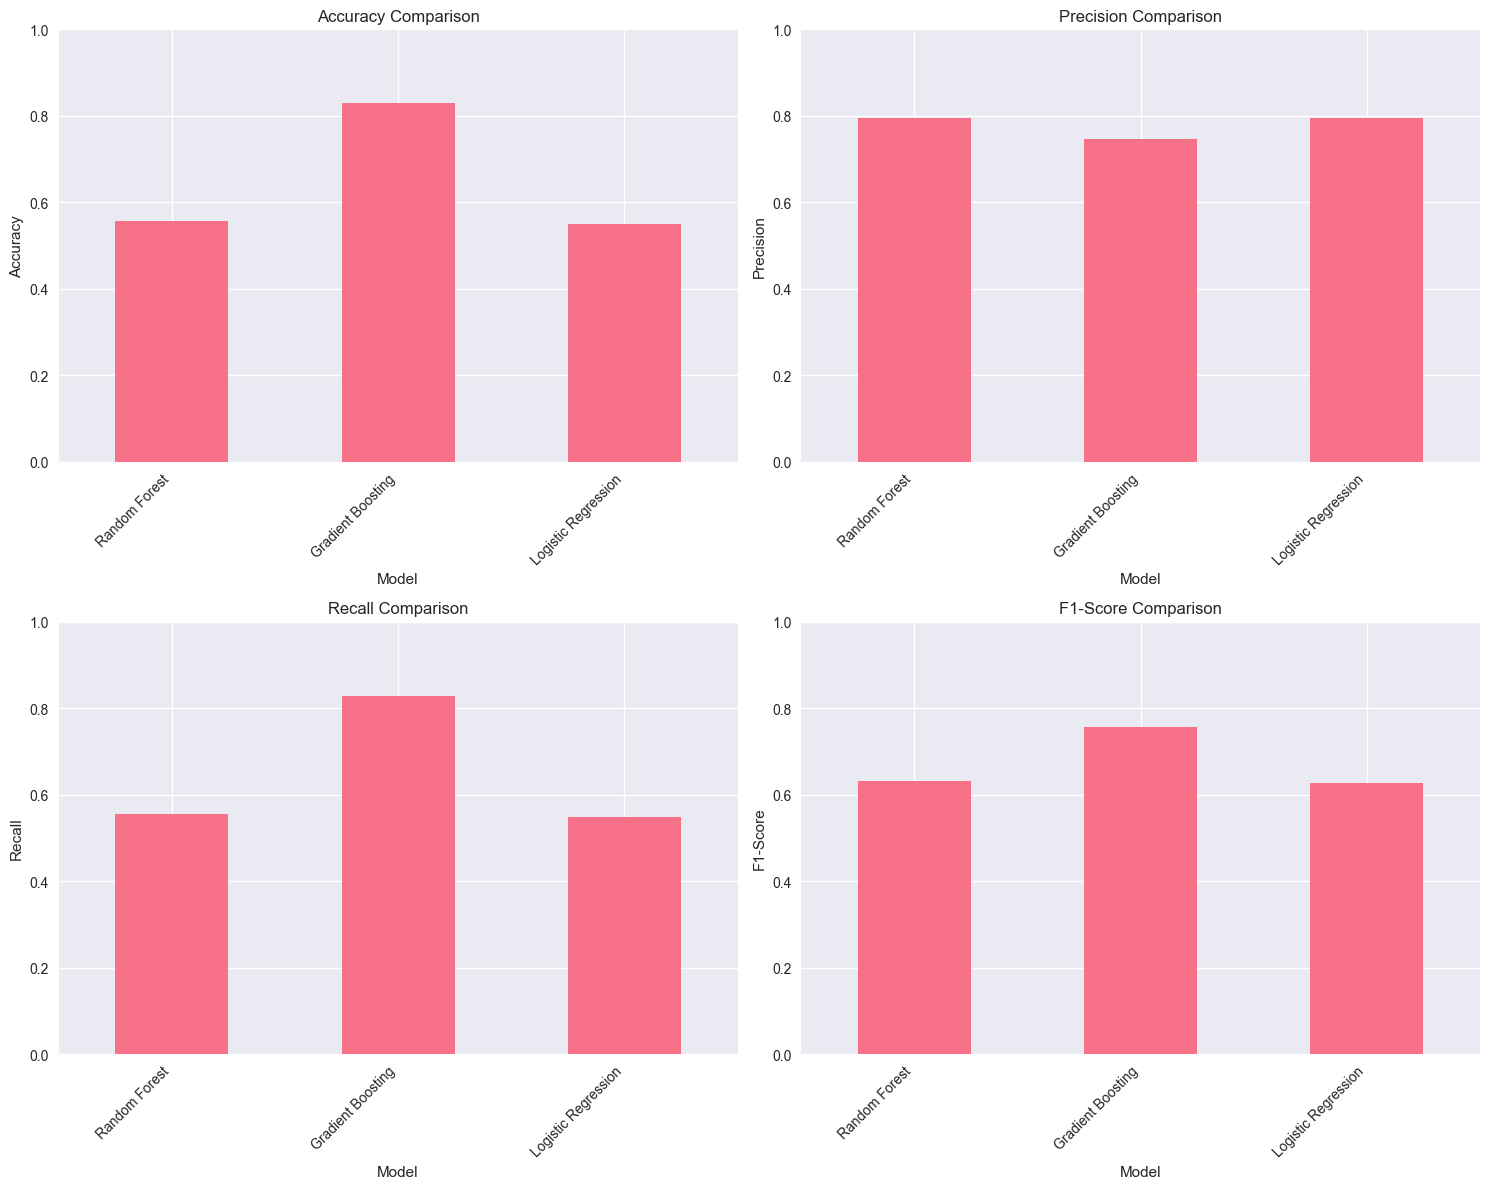

In [ ]:
# Calculate comprehensive metrics for all models
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Calculate metrics for all models on test set
results = []
results.append(calculate_metrics(y_test, y_test_pred_rf, 'Random Forest'))
results.append(calculate_metrics(y_test, y_test_pred_gb, 'Gradient Boosting'))
results.append(calculate_metrics(y_test, y_test_pred_lr, 'Logistic Regression'))

# Create comparison DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison (Test Set):")
print("="*60)
print(results_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()


### 6.2 Confusion Matrices and Classification Reports


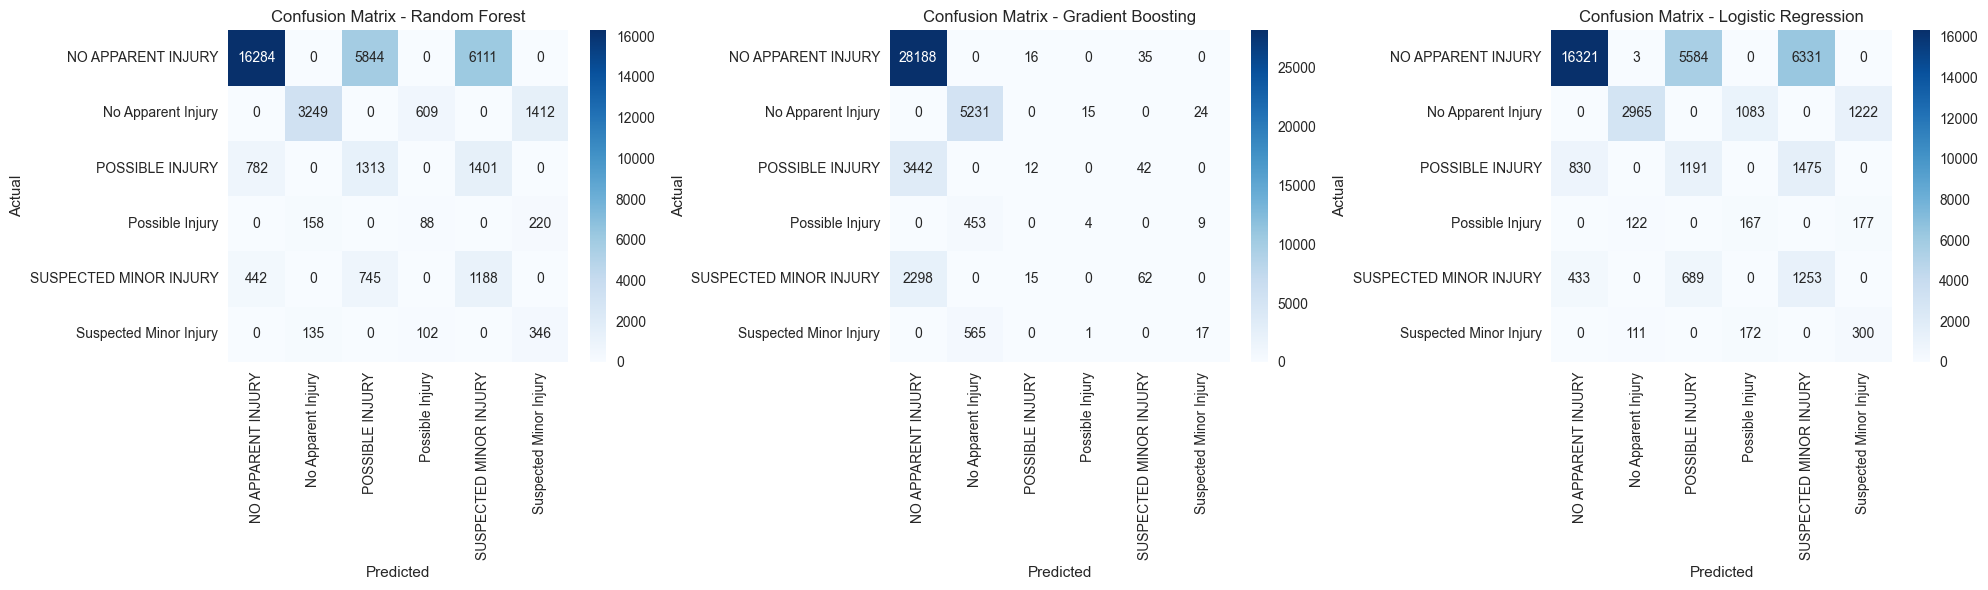

RANDOM FOREST CLASSIFICATION REPORT
                        precision    recall  f1-score   support

    NO APPARENT INJURY       0.93      0.58      0.71     28239
    No Apparent Injury       0.92      0.62      0.74      5270
       POSSIBLE INJURY       0.17      0.38      0.23      3496
       Possible Injury       0.11      0.19      0.14       466
SUSPECTED MINOR INJURY       0.14      0.50      0.21      2375
Suspected Minor Injury       0.17      0.59      0.27       583

              accuracy                           0.56     40429
             macro avg       0.41      0.48      0.38     40429
          weighted avg       0.80      0.56      0.63     40429


GRADIENT BOOSTING CLASSIFICATION REPORT
                        precision    recall  f1-score   support

    NO APPARENT INJURY       0.83      1.00      0.91     28239
    No Apparent Injury       0.84      0.99      0.91      5270
       POSSIBLE INJURY       0.28      0.00      0.01      3496
       Possible Injury 

In [ ]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

models = [
    (y_test, y_test_pred_rf, 'Random Forest'),
    (y_test, y_test_pred_gb, 'Gradient Boosting'),
    (y_test, y_test_pred_lr, 'Logistic Regression')
]

for i, (y_true, y_pred, name) in enumerate(models):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=sorted(y_test.unique()),
                yticklabels=sorted(y_test.unique()))
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification reports
print("="*60)
print("RANDOM FOREST CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred_rf))

print("\n" + "="*60)
print("GRADIENT BOOSTING CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred_gb))

print("\n" + "="*60)
print("LOGISTIC REGRESSION CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred_lr))


## 7. Model Selection and Final Evaluation


In [ ]:
# Select best model based on test accuracy
model_scores = {
    'Random Forest': rf_test_acc,
    'Gradient Boosting': gb_test_acc,
    'Logistic Regression': lr_test_acc
}

best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_model_score:.4f}")
print("\nAll Model Scores:")
for model, score in sorted(model_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"  {model}: {score:.4f}")

# Save the best model
if best_model_name == 'Random Forest':
    joblib.dump(rf_model, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
elif best_model_name == 'Gradient Boosting':
    joblib.dump(gb_model, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
else:
    joblib.dump(lr_model, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')

# Save feature names and preprocessing info
preprocessing_info = {
    'selected_features': selected_features,
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'feature_names': list(X_final.columns),
    'best_model': best_model_name
}
joblib.dump(preprocessing_info, 'preprocessing_info.pkl')

print("\nModels and preprocessing information saved successfully!")


Best Model: Gradient Boosting
Test Accuracy: 0.8290

All Model Scores:
  Gradient Boosting: 0.8290
  Random Forest: 0.5557
  Logistic Regression: 0.5490

Models and preprocessing information saved successfully!
